
# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Data Dictionary
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [113]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [3]:
bike = pd.read_csv('day.csv')

## Exploratory Data Analysis (EDA)
We will look at the data and anlyse different columns.
This will involve
- Finding missing values.
- Univariate Analysis
- Multivariate Analysis
- Dropping columns that are not helpful in analysis.
- Create dummy variables for categorical variables.
- Scaling variables.
- Identifying multicollinearity variables and removing them based on VIF score.

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Univariate Analysis

In [9]:
bike.dteday.value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

In [8]:
# Analysing values some columns
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [12]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [13]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
bike.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [15]:
bike.workingday.value_counts(
    
)

1    504
0    226
Name: workingday, dtype: int64

In [16]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
bike.isnull().value_counts()

instant  dteday  season  yr     mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  casual  registered  cnt  
False    False   False   False  False  False    False    False       False       False  False  False  False      False   False       False    730
dtype: int64

### There is no missing values in dataset.

## Dropping columns that are not useful for our analysis

1. instant - This is a index column
2. dteday -  This column is not useful since we already have yr, mnth and weekday columns representing the same data.
3. casual - Since we we only care about total no of users.
4. registerted - Since we only care about total no of users.

In [21]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bike.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### From data dictionary columns 'temp' and 'atemp' seems to convey same information. Lets check and verify. 

In [23]:
bike['temp'].value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [24]:
bike['atemp'].value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [25]:
bike['temp'].corr(bike['atemp'])

0.9916961786905644

### As visible from the definition and 99% correlation we can colclude that we can safely drop this column.

In [28]:
bike.drop(['atemp'], axis=1, inplace=True)

In [31]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [37]:
# Dividing the variables into categorical and continuous variables
bike_categorical_columns = ['season', 'yr', 'holiday', 'workingday', 'weathersit']
bike_continuous_columns = ['mnth', 'weekday', 'temp', 'hum','windspeed' ,'cnt']

bike.shape[1] ==  len(bike_categorical_columns) + len(bike_continuous_columns)

True

### Visualising categorical columns value distribution.

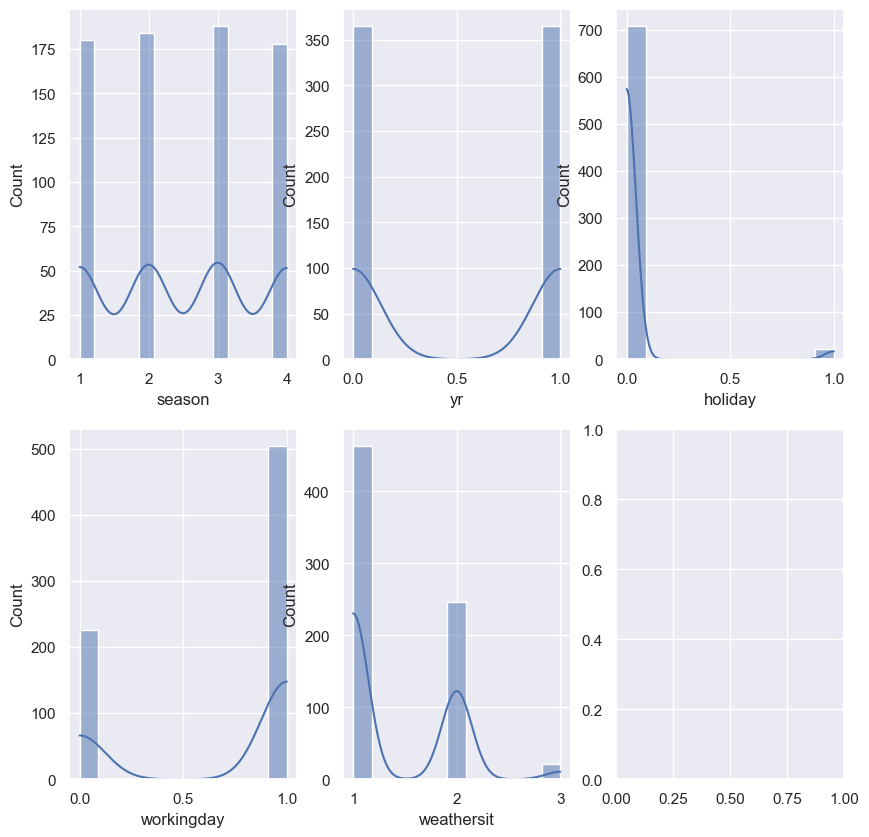

In [39]:
sns.set(style="darkgrid")
fix, axis = plt.subplots(2,3, figsize=(10,10))
column = 0

for i in range(2):
    for j in range(3):
        sns.histplot(data=bike, x=bike_categorical_columns[column], kde=True, ax=axis[i,j])
        column+=1
        if column == 5:
            break

plt.show()


### Creating dummy variables out of categrorical columns

1. Season - there are 4 seasons, 3 new dummy variables can be added.
2. Weathersit - there are 3 different values therefore 2 new dummy variables can be created.

In [40]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [41]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [44]:
season_dummy = pd.get_dummies(bike['season'])
season_dummy.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [47]:
season_dummy.columns

Int64Index([1, 2, 3, 4], dtype='int64')

In [49]:
# We can drop first columns since other 3 columns can represent this column with all values set to 0
season_dummy.drop(columns=[1], axis=1, inplace=True)

In [50]:
season_dummy.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [51]:
# Rename columns
season_dummy.rename(columns={2: "season_summer", 3: "season_fall", 4: "season_winter"}, inplace=True)


In [53]:
season_dummy.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [56]:
weathersit_dummy = pd.get_dummies(bike['weathersit'])

# Drop first column
weathersit_dummy.drop(columns=[1], axis=1, inplace=True)

weathersit_dummy.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [57]:
bike['weathersit'].value_counts(
    
)

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [60]:
# Rename columns
weathersit_dummy.rename(columns={2: "weathersit_mist", 3: "weathersit_light"}, inplace=True)

In [61]:
weathersit_dummy.head()

,weathersit_mist,weathersit_light
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [62]:
# Merging these dummy variables with original dataset
bike = pd.concat((bike, season_dummy, weathersit_dummy), axis=1)


In [63]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [67]:
# Drop original variables since dummy variable has been added for them.
bike.drop(['season', 'weathersit'], axis=1, inplace=True)


In [68]:
bike.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'season_summer', 'season_fall', 'season_winter',
       'weathersit_mist', 'weathersit_light'],
      dtype='object')

### Visualising continuous variables with value distribution

In [69]:
len(bike_continuous_columns)

6

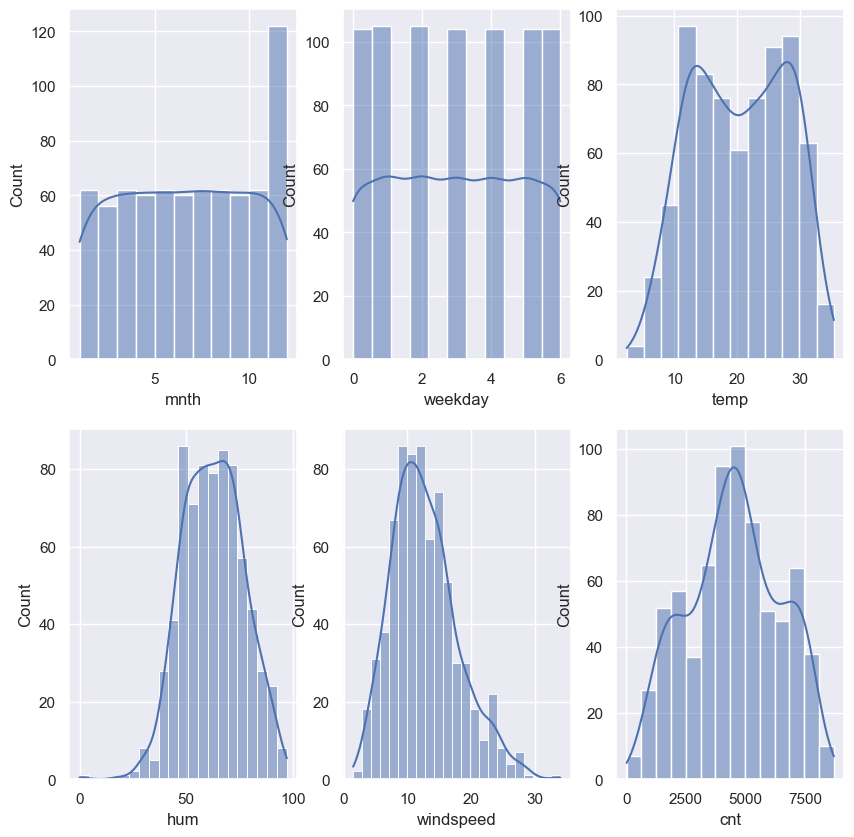

In [70]:
sns.set(style="darkgrid")
fix, axis = plt.subplots(2,3, figsize=(10,10))
column = 0

for i in range(2):
    for j in range(3):
        sns.histplot(data=bike, x=bike_continuous_columns[column], kde=True, ax=axis[i,j])
        column+=1

plt.show()

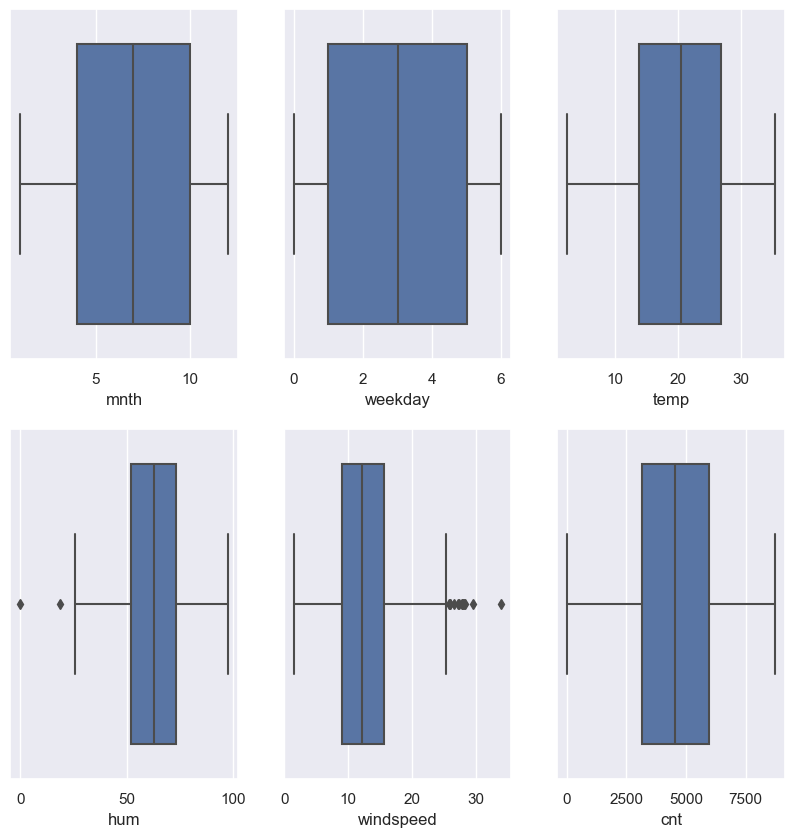

In [73]:
#### Visualing the outliers by boxplot

sns.set(style="darkgrid")
fix, axis = plt.subplots(2,3, figsize=(10,10))
column = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(data=bike, x=bike_continuous_columns[column], ax=axis[i,j])
        column+=1

plt.show()

In [90]:
# Columns 'hum' and 'windspeed' has outliers, lets cleanup the outliers

Q1 = bike['hum'].quantile(0.25)
Q3 = bike['hum'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
bike_clean = bike[bike['hum'] > lower]

In [87]:
bike_clean.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [91]:
Q1 = bike_clean['windspeed'].quantile(0.25)
Q3 = bike_clean['windspeed'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
bike_clean = bike_clean[bike_clean['windspeed'] < upper]

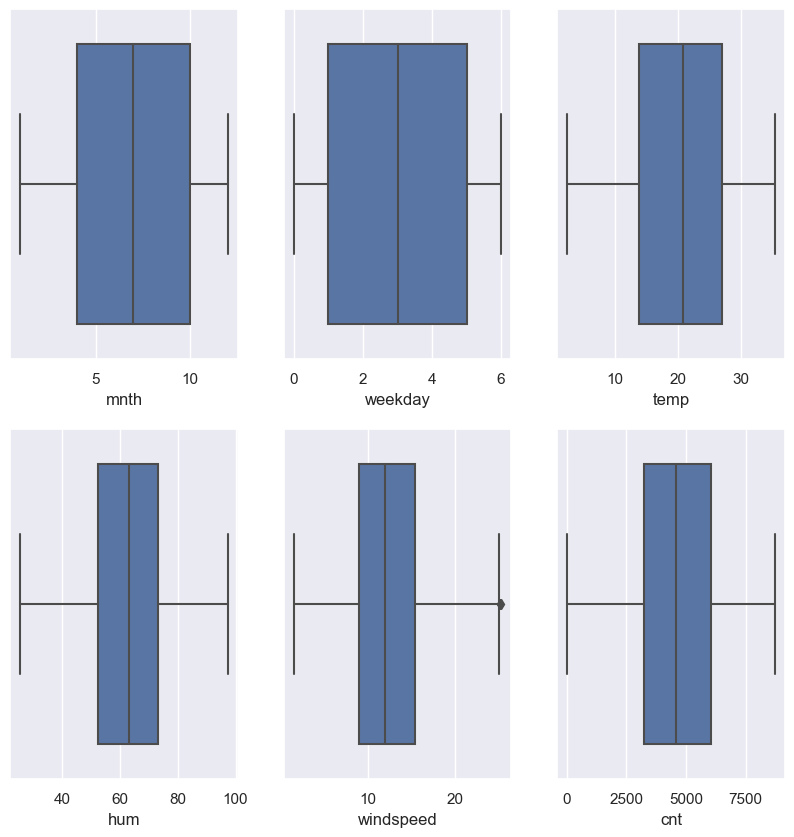

In [92]:
#### Visualing boxplot without outliers

sns.set(style="darkgrid")
fix, axis = plt.subplots(2,3, figsize=(10,10))
column = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(data=bike_clean, x=bike_continuous_columns[column], ax=axis[i,j])
        column+=1

plt.show()

## Bivariate analysis

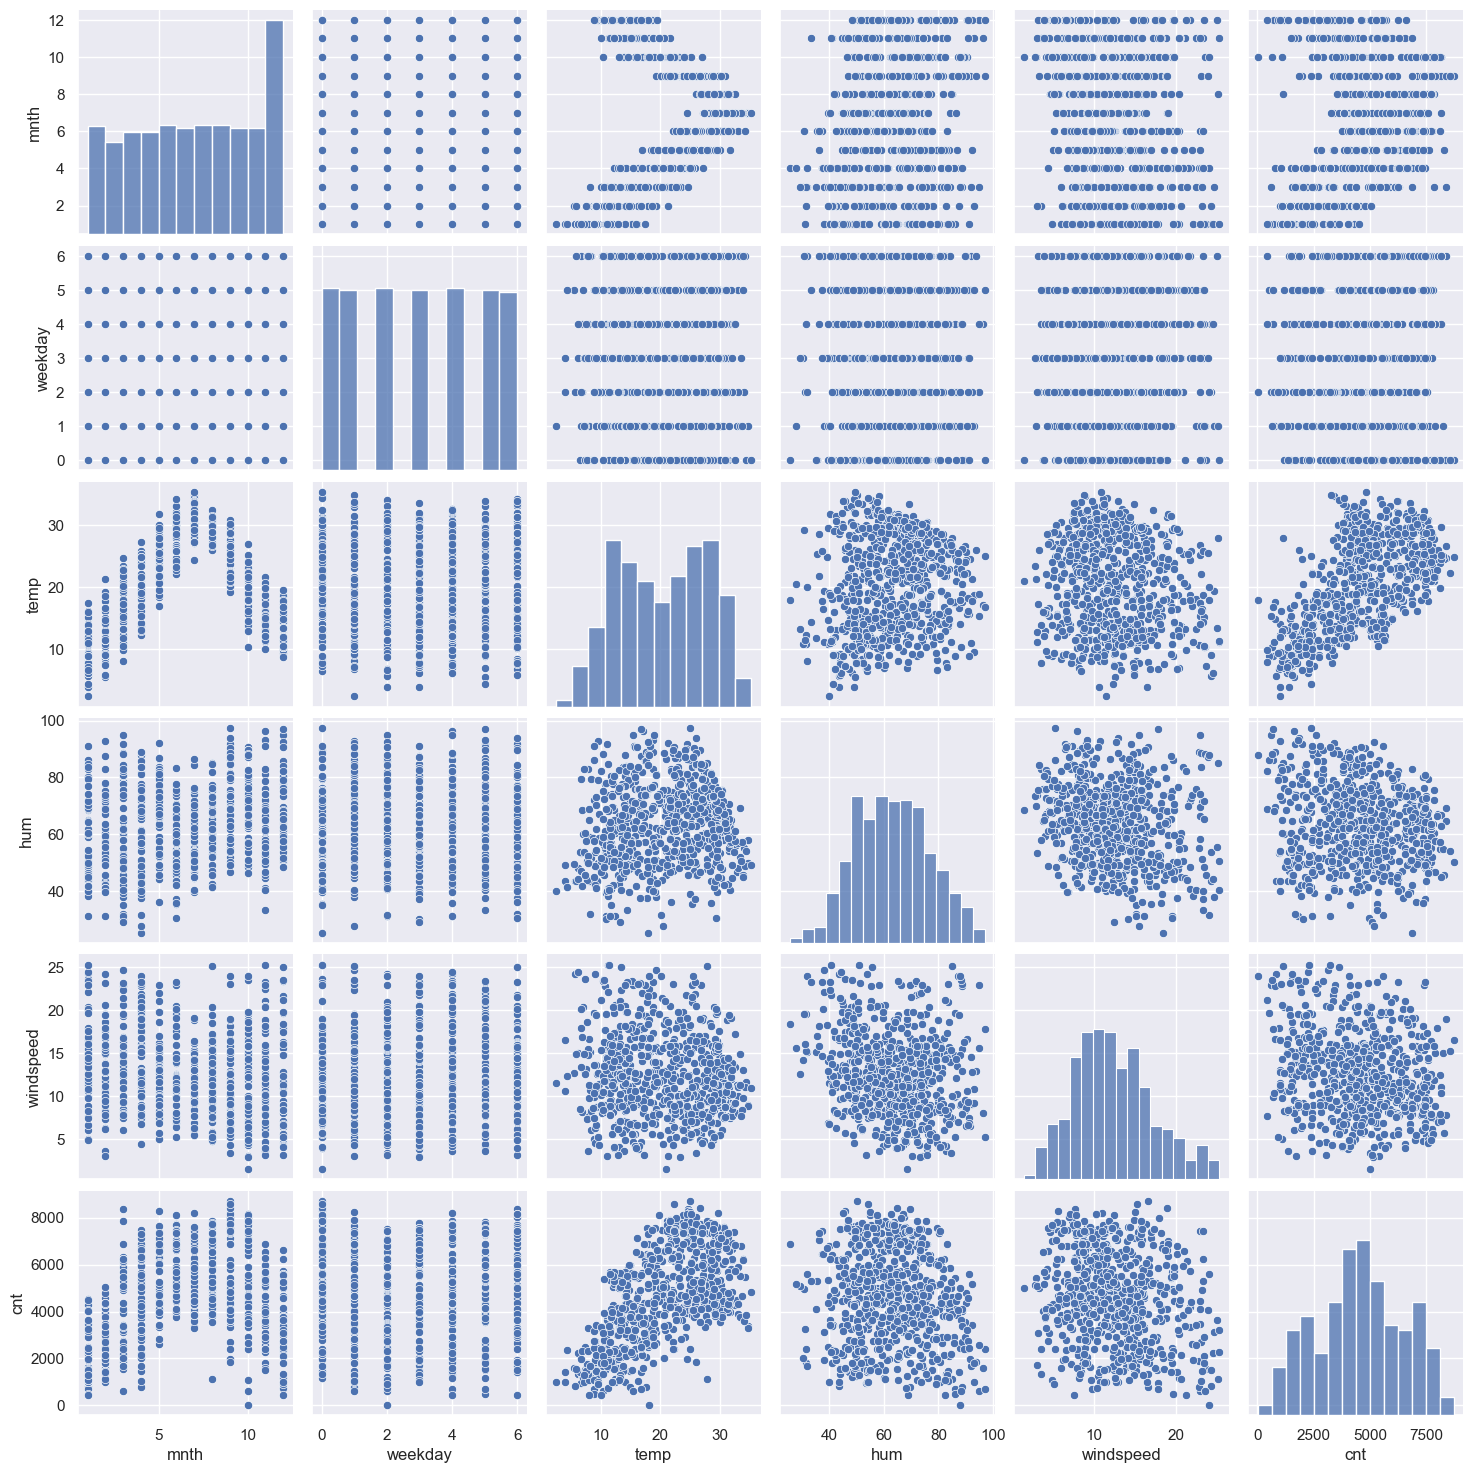

In [94]:
sns.pairplot(bike_clean[bike_continuous_columns])

[]

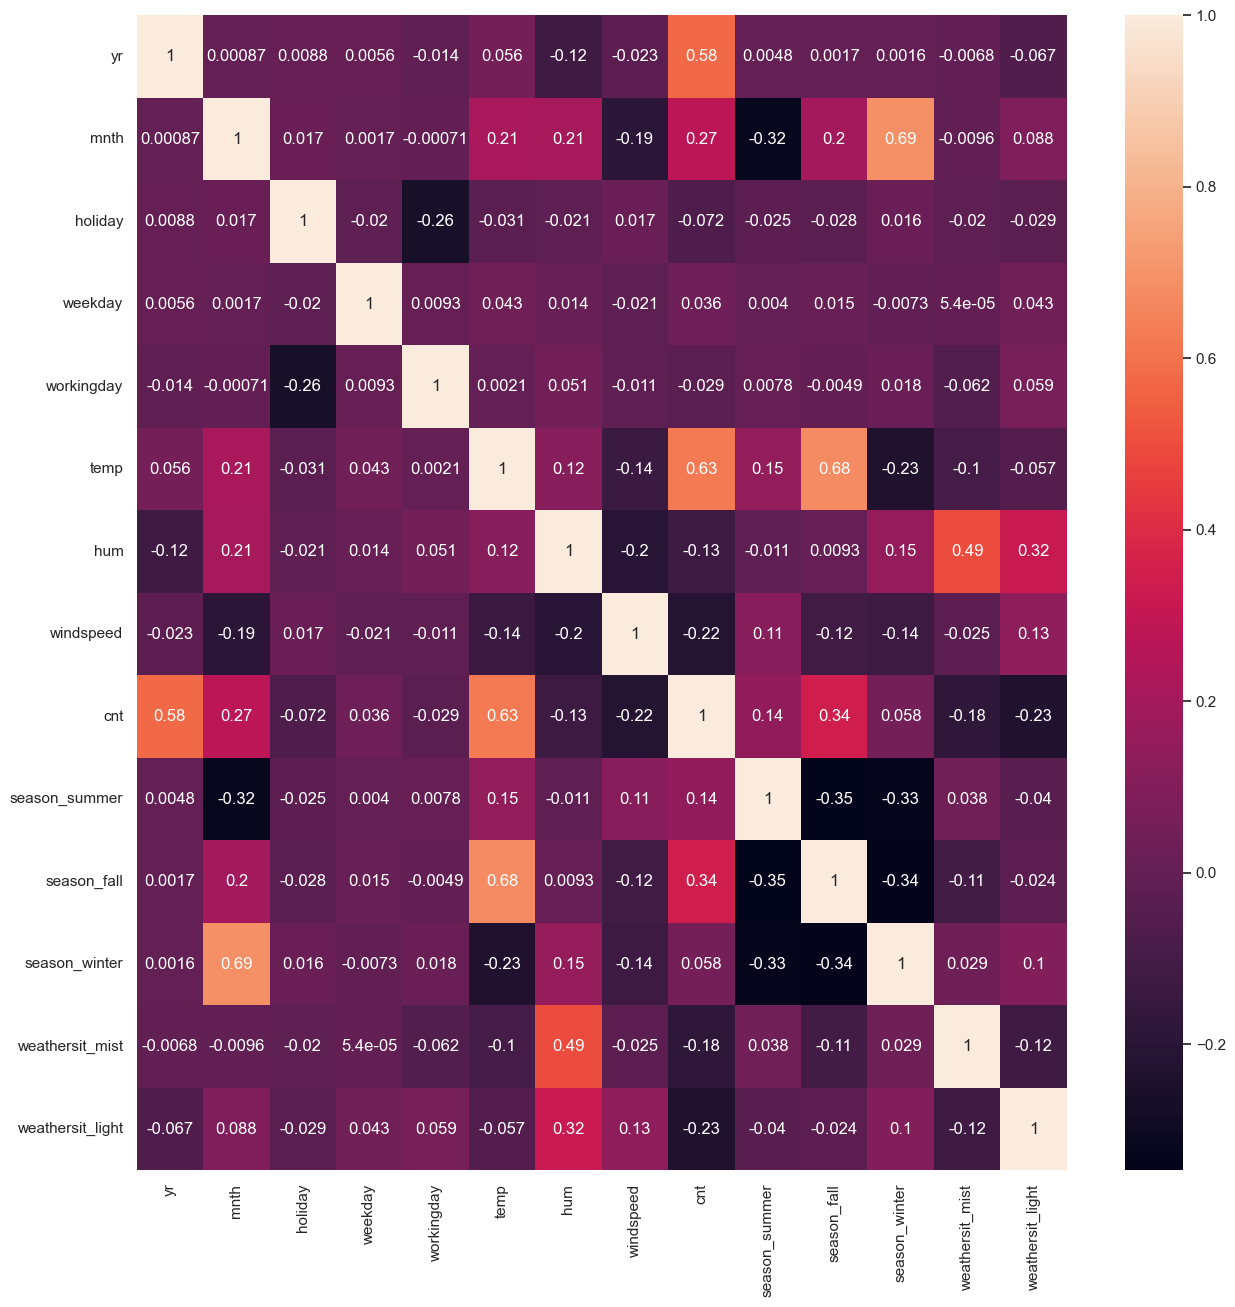

In [100]:
plt.figure(figsize=(15,15))
sns.heatmap(bike_clean.corr(), annot=True)
plt.plot()

### Multicollinearity
 Removing variables that have multicollinearity means they are highly correlated.

In [105]:
# Splitting the data in test and training set.
bike_train, bike_test = train_test_split(bike_clean, train_size=0.7, test_size=0.3, random_state=100)


### Scaling the numiric/continuous varialbles
We will use MinMax scaling

In [107]:
scaler = MinMaxScaler()

In [108]:
bike_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
728,1,12,0,1,1,10.489153,48.3333,23.500518,1796,0,0,0,0,0
541,1,6,0,3,1,25.864153,37.3333,23.292014,7442,0,1,0,0,0
116,0,4,0,5,1,25.420000,83.5417,20.917400,3872,1,0,0,1,0
718,1,12,0,5,1,13.530000,66.7917,8.875021,4128,0,0,1,1,0
496,1,5,0,0,0,23.130847,48.0417,8.249911,7429,1,0,0,0,0


In [109]:
bike_train[bike_continuous_columns] = scaler.fit_transform(bike_train[bike_continuous_columns])
bike_train.head() 

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
728,1,1.000000,0,0.166667,1,0.252441,0.293114,0.923102,0.204096,0,0,0,0,0
541,1,0.454545,0,0.500000,1,0.733702,0.126342,0.914353,0.853659,0,1,0,0,0
116,0,0.272727,0,0.833333,1,0.719799,0.826912,0.814718,0.442936,1,0,0,1,0
718,1,1.000000,0,0.833333,1,0.347624,0.572964,0.309436,0.472388,0,0,1,1,0
496,1,0.363636,0,0.000000,0,0.648145,0.288693,0.283207,0.852163,1,0,0,0,0


In [110]:
# Divide into X and Y sets for model building.

y_train = bike_train.pop('cnt')
X_train = bike_train

In [111]:
y_train

728    0.204096
541    0.853659
116    0.442936
718    0.472388
496    0.852163
         ...   
590    0.777957
55     0.165555
356    0.251611
82     0.212034
532    0.800276
Name: cnt, Length: 501, dtype: float64

In [112]:
X_train

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
728,1,1.000000,0,0.166667,1,0.252441,0.293114,0.923102,0,0,0,0,0
541,1,0.454545,0,0.500000,1,0.733702,0.126342,0.914353,0,1,0,0,0
116,0,0.272727,0,0.833333,1,0.719799,0.826912,0.814718,1,0,0,1,0
718,1,1.000000,0,0.833333,1,0.347624,0.572964,0.309436,0,0,1,1,0
496,1,0.363636,0,0.000000,0,0.648145,0.288693,0.283207,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,1,0.636364,0,0.500000,1,0.856692,0.601391,0.412594,0,1,0,0,0
55,0,0.090909,0,0.000000,0,0.391705,0.640062,0.911252,0,0,0,1,0
356,0,1.000000,0,0.000000,0,0.403236,0.600758,0.708020,0,0,0,0,0
82,0,0.181818,0,1.000000,0,0.289873,0.782059,0.622393,1,0,0,1,0


### Building our model
 we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [125]:
# Calculate VIF for multi collinearity

def calculate_vif():
  vif_data = pd.DataFrame()
  vif_data['feature'] = X_train.columns
  vif_data['VIF'] = [variance_inflation_factor(X_train.values,i ) for i in range(len(X_train.columns))]
  return vif_data


In [127]:
vif_data = calculate_vif()
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
5,temp,21.206686
1,mnth,11.794831
6,hum,11.182531
9,season_fall,7.976704
10,season_winter,6.319331
7,windspeed,4.306934
8,season_summer,3.539630
4,workingday,3.274646
3,weekday,3.048192
11,weathersit_mist,2.517976


#### Variable 'temp' has high VIF, lets remove and then recalculate VIF

In [129]:
# Dropping 'temp' column

X_train.drop(['temp'], axis=1, inplace=True)

In [130]:
# Calculate VIF again
vif_data = calculate_vif()
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
1,mnth,11.768862
5,hum,9.053611
9,season_winter,5.978999
6,windspeed,4.069120
8,season_fall,3.745737
4,workingday,3.271035
3,weekday,2.929947
10,weathersit_mist,2.411727
7,season_summer,2.112760
0,yr,1.914209


#### Variable 'mnth' also has high VIF, lets remove and then recalculate VIF

In [131]:
# Dropping 'mnth' column

X_train.drop(['mnth'], axis=1, inplace=True)

In [132]:
# Calculate VIF again
vif_data = calculate_vif()
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
4,hum,8.383117
5,windspeed,3.981797
3,workingday,3.267930
2,weekday,2.918201
9,weathersit_mist,2.394563
7,season_fall,2.143404
8,season_winter,2.024254
6,season_summer,1.959192
0,yr,1.904477
10,weathersit_light,1.226808


#### Variable 'hum' has high VIF, lets remove and then recalculate VIF

In [133]:
# Dropping 'hum' column

X_train.drop(['hum'], axis=1, inplace=True)

In [134]:
# Calculate VIF again
vif_data = calculate_vif()
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
4,windspeed,3.841955
3,workingday,2.980645
2,weekday,2.817701
0,yr,1.901414
6,season_fall,1.787548
5,season_summer,1.770883
7,season_winter,1.689703
8,weathersit_mist,1.526209
1,holiday,1.095461
9,weathersit_light,1.084594


#### All VIF are under 5 so we can proceed with training the model.

#### Using statsmodel to train model and get detailed statistics.

In [135]:
# Adding constant
X_train = sm.add_constant(X_train)

In [138]:
# Running the linear model
lm = sm.OLS(y_train,X_train).fit()

In [139]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     158.1
Date:                Sat, 13 May 2023   Prob (F-statistic):          2.20e-146
Time:                        19:50:32   Log-Likelihood:                 395.25
No. Observations:                 501   AIC:                            -768.5
Df Residuals:                     490   BIC:                            -722.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2947      0.021  

#### Column 'weekday' has high P value of 0.567 and should be dropped.

In [141]:
# Dropping column 'weekday'
X_train.drop(['weekday'], axis=1, inplace=True)

Rebuilding the model after dropping column 'weekday'.

In [142]:
lm = sm.OLS(y_train, X_train).fit()

In [144]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.90e-147
Time:                        19:55:46   Log-Likelihood:                 395.09
No. Observations:                 501   AIC:                            -770.2
Df Residuals:                     491   BIC:                            -728.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2991      0.020  

### Residual Analysis of the train data.
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [145]:
y_train_pred = lm.predict(X_train)

Text(0.5, 12.44444444444443, 'Errors')

<Figure size 640x480 with 0 Axes>

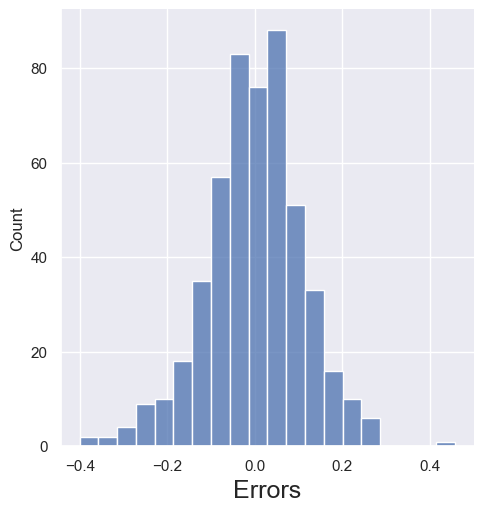

In [146]:
fig = plt.figure()
sns.displot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [167]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.7632828889589733

### Making Predictions

Scaling the features

In [147]:
bike_test[bike_continuous_columns] = scaler.transform(bike_test[bike_continuous_columns])

In [148]:
bike_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
583,1,0.636364,0,0.500000,1,0.868455,0.627290,0.265707,0.834215,0,1,0,1,0
493,1,0.363636,0,0.666667,1,0.662048,0.688567,0.545436,0.540152,1,0,0,1,0
294,0,0.818182,0,0.166667,1,0.466335,0.514214,0.197559,0.493097,0,0,1,0,0
157,0,0.454545,0,0.666667,1,0.832094,0.466836,0.465023,0.553497,1,0,0,0,0
670,1,0.909091,0,1.000000,0,0.379708,0.351863,0.685331,0.670156,0,0,1,0,0


In [150]:
# Divide test data into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [161]:
X_train.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'weathersit_mist', 'weathersit_light'],
      dtype='object')

In [159]:
X_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weathersit_mist,weathersit_light
583,1,0.636364,0,0.500000,1,0.868455,0.627290,0.265707,0,1,0,1,0
493,1,0.363636,0,0.666667,1,0.662048,0.688567,0.545436,1,0,0,1,0
294,0,0.818182,0,0.166667,1,0.466335,0.514214,0.197559,0,0,1,0,0
157,0,0.454545,0,0.666667,1,0.832094,0.466836,0.465023,1,0,0,0,0
670,1,0.909091,0,1.000000,0,0.379708,0.351863,0.685331,0,0,1,0,0


In [162]:
# Now we will use our model to make predictions.
X_train.drop(['const'], axis=1, inplace=True)
X_test = X_test[X_train.columns]

# Add constant
X_test = sm.add_constant(X_test)

In [163]:
# Making predictions
y_pred = lm.predict(X_test)

### Model Evaluation

Text(0, 0.5, 'y_pred')

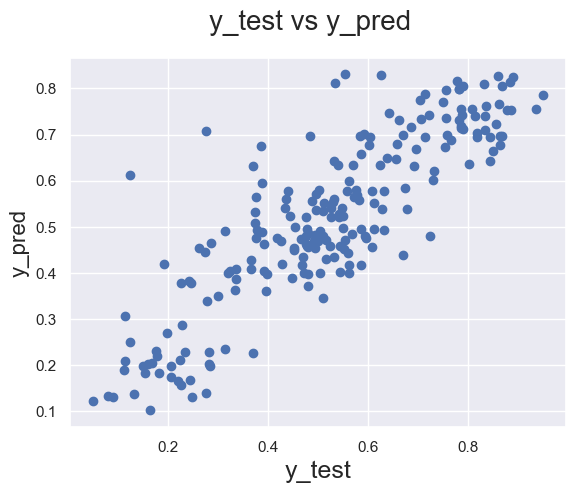

In [164]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

### Residual Analysis

Text(0.5, 12.44444444444443, 'Errors')

<Figure size 640x480 with 0 Axes>

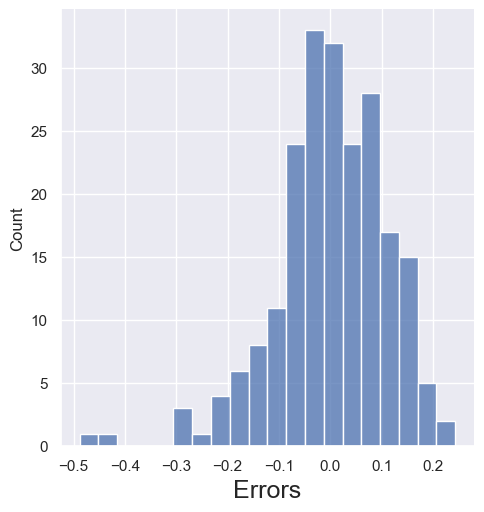

In [166]:
fig = plt.figure()
sns.displot((y_test - y_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [165]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7306756526819995